## Libraries import

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re
import torch
import math
from sklearn.metrics import f1_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

## Data load

In [ ]:
df = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data_train = pd.DataFrame(data = df.data)
data_train['Class'] = df.target
data_train.rename(columns={0: "Article"}, inplace = True)
del(df)
df = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
data_test = pd.DataFrame(data = df.data)
data_test['Class'] = df.target
data_test.rename(columns={0: "Article"}, inplace = True)
del(df)
data = [data_train, data_test]

In [ ]:
data_train.shape, data_test.shape

((11314, 2), (7532, 2))

In [ ]:
data_train.head(15)

,Article,Class
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
5,\n\n\n\n\nOf course. The term must be rigidly...,16
6,There were a few people who responded to my re...,13
7,...,3
8,I have win 3.0 and downloaded several icons an...,2
9,"\n\n\nI've had the board for over a year, and ...",4


## Data preprocessing

In [ ]:
for d in data:
  d['Article'] = d['Article'].apply(lambda x: re.findall("[\w']+", x.lower())) #split words

In [ ]:
data_train.head(15)

,Article,Class
0,"[i, was, wondering, if, anyone, out, there, co...",7
1,"[a, fair, number, of, brave, souls, who, upgra...",4
2,"[well, folks, my, mac, plus, finally, gave, up...",4
3,"[do, you, have, weitek's, address, phone, numb...",1
4,"[from, article, c5owcb, n3p, world, std, com, ...",14
5,"[of, course, the, term, must, be, rigidly, def...",16
6,"[there, were, a, few, people, who, responded, ...",13
7,"[all, this, shows, is, that, you, don't, know,...",3
8,"[i, have, win, 3, 0, and, downloaded, several,...",2
9,"[i've, had, the, board, for, over, a, year, an...",4


In [ ]:
# delete stop words
# from https://gist.github.com/sebleier/554280
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [ ]:
for d in data:
  d['Article'] = d['Article'].apply(lambda x: [y for y in [re.sub(r"[^A-Za-z]","",re.sub(r"\\n", "", token)).strip() for token in x] if y != "" and y != " " and y not in stop_words]) #clear data

In [ ]:
data_train.head(15)

,Article,Class
0,"[wondering, enlighten, car, day, door, sports,...",7
1,"[fair, number, brave, souls, upgraded, clock, ...",4
2,"[folks, mac, finally, ghost, weekend, starting...",4
3,"[weiteks, address, phone, number, chip]",1
4,"[article, cowcb, np, std, tombaker, std, tom, ...",14
5,"[term, rigidly, defined, doubt, term, quote, a...",16
6,"[people, responded, request, info, treatment, ...",13
7,"[dont, scsi, scsi, scsi, controler, chip, rang...",3
8,"[win, downloaded, icons, bmps, figure, change,...",2
9,"[ive, board, year, work, diskdoubler, autodoub...",4


In [ ]:
# check for empty token instances
table_names = ["train", "test"]
for d, table in zip(data, table_names):
  print(f"Table {table} has {d[[not bool(x) for x in d['Article']]].shape[0]} empty articles")

Table train has 330 empty articles
Table test has 242 empty articles


In [ ]:
# delete these rows
for d, table in zip(data, table_names):
  print(f"Shape before deletion {d.shape[0]} for table {table}")
  d.drop(d[[not bool(x) for x in d['Article']]].index, inplace = True)
  print(f"Shape after deletion {d.shape[0]} for table {table}")

Shape before deletion 11314 for table train
Shape after deletion 10984 for table train
Shape before deletion 7532 for table test
Shape after deletion 7290 for table test


In [ ]:
data_train.head(15)

,Article,Class
0,"[wondering, enlighten, car, day, door, sports,...",7
1,"[fair, number, brave, souls, upgraded, clock, ...",4
2,"[folks, mac, finally, ghost, weekend, starting...",4
3,"[weiteks, address, phone, number, chip]",1
4,"[article, cowcb, np, std, tombaker, std, tom, ...",14
5,"[term, rigidly, defined, doubt, term, quote, a...",16
6,"[people, responded, request, info, treatment, ...",13
7,"[dont, scsi, scsi, scsi, controler, chip, rang...",3
8,"[win, downloaded, icons, bmps, figure, change,...",2
9,"[ive, board, year, work, diskdoubler, autodoub...",4


In [ ]:
class PorterStemming():
  # rules were taken from https://vijinimallawaarachchi.com/2017/05/09/porter-stemming-algorithm/
  def __init__(self):
    self.consonants :list = ['q', 'w', 'r', 't', 'p', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm']
    self.vowels :list = ['e', 'u', 'i', 'o', 'a']
    self.suffix_mapping : dict = {'part1a' : {'sses' : 'ss',
                                              'ies' : 'i',
                                              'ss' : 's',
                                              's' : ''},
                                  'part1b' : {'eed' : 'ee',
                                              'ed' : '',
                                              'ing' : ''},
                                  'part1ba' : {'at' : 'ate',
                                               'bl' : 'ble',
                                               'iz' : 'ize'},
                                  'part1c' : {'y' : 'i'},
                                  'part2' : {'ational' : 'ate',
                                             'tional' : 'tion',
                                             'enci' : 'ence',
                                             'anci' : 'ance',
                                             'izer' : 'ize',
                                             'abli' : 'able',
                                             'alli' : 'al',
                                             'entli' : 'ent',
                                             'eli' : 'e',
                                             'ousli' : 'ous',
                                             'ization' : 'ize',
                                             'ation' : 'ate',
                                             'ator' : 'ate',
                                             'alism' : 'al',
                                             'iveness' : 'ive',
                                             'fulness' : 'ful',
                                             'ousness' : 'ous',
                                             'aliti' : 'al',
                                             'iviti' : 'ive',
                                             'biliti' : 'ble'},
                                  'part3' : {'icate' : 'ic',
                                             'ative' : '',
                                             'alize' : 'al',
                                             'iciti' : 'ic',
                                             'ical' : 'ic',
                                             'ful' : '',
                                             'ness' : ''},
                                  'part4' : {'al' : '',
                                             'ance' : '',
                                             'ence' : '',
                                             'er' : '',
                                             'ic' : '',
                                             'able' : '',
                                             'ant' : '',
                                             'ement' : '',
                                             'ment' : '',
                                             'ent' : '',
                                             'ion' : '',
                                             'ou' : '',
                                             'ism' : '',
                                             'ate' : '',
                                             'iti' : '',
                                             'ous' : '',
                                             'ive' : '',
                                             'ize' : ''},
                                  'part5a' : {'e' : ''}}

  def _is_consonant_y(self, word : str, index : str):
    if index == 0 or word[index - 1] in self.vowels:
      return True
    else:
      return False
  def _is_consonant(self, word :str, index : int):
    if word[index] == 'y':
      return self._is_consonant_y(word, index)
    else:
      return word[index] in self.consonants

  def _vc(self, word : str, index: int):
    while index < len(word) and not self._is_consonant(word, index):
      index += 1
    if index == len(word):
      return False, index
    while index < len(word) and self._is_consonant(word, index):
      index += 1
    return True, index

  def _m_value(self, word :str):
    m : int = 0
    index : int = 0
    while index < len(word) and self._is_consonant(word, index):
      index += 1
    if index == 0 or index == len(word):
      return m
    is_vc, index = self._vc(word, index)
    while is_vc:
      m += 1
      is_vc, index = self._vc(word, index)
    return m

  def _contains_vowel(self, word: str):
    for i in range(len(word)):
      if not self._is_consonant(word, i):
        return True
    return False

  def _not_ends_with(self, word: str, char : str):
    return not word.endswith(char)

  def _ends_with_double_c(self, word : str):
    index = len(word) - 1
    return index > 1 and self._is_consonant(word, index) and self._is_consonant(word, index - 1)

  def _ends_with_cvc(self, word : str):
    index = len(word) - 1
    return (index > 1 and self._is_consonant(word, index - 2) and
            not self._is_consonant(word, index - 1) and self._is_consonant(word, index) and
            word[index] not in ['w', 'x', 'y'])

  def _step_1a(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part1a'].items():
        if tokens[i].endswith(suffix):
          tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_1ba(self, word: str):
        m_value = self._m_value(word)
        if m_value > 0:
          for suffix, replacement in self.suffix_mapping['part1ba'].items():
            if word.endswith(suffix):
              word = re.sub(f"{suffix}$", replacement, word)
              return word
        if self._not_ends_with(word, 'l') and self._not_ends_with(word, 's') and self._not_ends_with(word, 'z') and self._ends_with_double_c(word):
          word = word[:-1]
        elif m_value == 1 and self._ends_with_cvc(word):
          word = word[:-3] + 'e'
        return word

  def _step_1b(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part1b'].items():
        if tokens[i].endswith(suffix):
          if ((suffix == "eed" and self._m_value(tokens[i]) > 0) or
              suffix != "eed" and self._contains_vowel(tokens[i])):
            tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
            if suffix != "eed":
              tokens[i] = self._step_1ba(tokens[i])
    return tokens

  def _step_1c(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part1c'].items():
        if tokens[i].endswith(suffix) and self._contains_vowel(tokens[i]):
          tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_2(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part2'].items():
        if tokens[i].endswith(suffix) and self._m_value(tokens[i]) > 0:
          tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_3(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part3'].items():
        if tokens[i].endswith(suffix) and self._m_value(tokens[i]) > 0:
          tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_4(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part4'].items():
        if tokens[i].endswith(suffix) and self._m_value(tokens[i]) > 1:
          if ((suffix == "ion" and not self._not_ends_with(tokens[i], 's')
          and not self._not_ends_with(tokens[i], 't')) or (suffix != "ion")):
            tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_5a(self, tokens : list):
    for i in range(len(tokens)):
      for suffix, replacement in self.suffix_mapping['part5a'].items():
        if (tokens[i].endswith(suffix) and (self._m_value(tokens[i]) > 1 or
         (self._m_value(tokens[i]) == 1 and not self._ends_with_cvc(tokens[i])))):
          tokens[i] = re.sub(f"{suffix}$", replacement, tokens[i])
    return tokens

  def _step_5b(self, tokens : list):
    for i in range(len(tokens)):
      if self._not_ends_with(tokens[i], 'l') and self._ends_with_double_c(tokens[i]) and self._m_value(tokens[i]) > 1:
        tokens[i] = tokens[i][:-1]
    return tokens

  def convert(self, data : pd.DataFrame):
    data['Article'] = data['Article'].apply(lambda x: self._step_1a(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_1b(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_1c(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_2(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_3(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_4(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_5a(x))
    data['Article'] = data['Article'].apply(lambda x: self._step_5b(x))
    return data

In [ ]:
stemmer = PorterStemming()

In [ ]:
for d in data:
  d = stemmer.convert(d)

In [ ]:
data_train.head(15)

,Article,Class
0,"[wond, enlighten, car, dai, door, sport, car, ...",7
1,"[fair, numb, brav, soul, upgrad, clock, oscill...",4
2,"[folk, mac, fin, ghost, weeken, star, lif, soo...",4
3,"[weitek, addre, phon, numb, chip]",1
4,"[article, cowcb, np, std, tombak, std, tom, ba...",14
5,"[term, rigidli, defin, doubt, term, quot, alle...",16
6,"[peopl, respon, reques, info, treat, astrocyto...",13
7,"[dont, scsi, scsi, scsi, control, chip, rang, ...",3
8,"[win, download, icon, bmp, figur, chang, wallp...",2
9,"[ive, board, year, work, diskdoubl, autodouble...",4


## TF-IDF

In [ ]:
class Vectorizer():

  def __init__(self):
    self.vocab : dict = {}
    self.idf : dict = {}

  def _CalcIDF(self, docs : pd.Series, words_set : set):
    num_docs : int = docs.shape[0]
    self.idf : dict = {}
    print(f"Total tokens in train: {len(words_set)}")
    doc_freq = Counter(token for doc in docs for token in set(doc))
    self.idf = {token: math.log(num_docs / (doc_freq[token] + 1)) for token in doc_freq}

  def _update_vocab(self, tokens: list, words_set : set):
    for token in tokens:
      words_set.add(token)

  def _fit(self, data : pd.DataFrame):
    words_set : set = set()
    for article in data['Article'].values:
      for token in article:
        words_set.add(token)
    self.vocab = {j:i for i, j in enumerate(sorted(list(words_set)))}
    self._CalcIDF(data['Article'], words_set)

  def transform(self, data : pd.DataFrame):
    matrix : torch.Tensor = torch.empty(size = (data.shape[0], len(self.vocab)))
    for row, article in enumerate(data['Article'].values):
      total_words = len(article)
      word_count = Counter(article)
      for token in article:
        if token in self.vocab.keys():
          tf = word_count[token] / total_words
          matrix[row, self.vocab[token]] = tf * self.idf[token]
    matrix = torch.div(matrix, torch.max(matrix))
    return matrix

  def fit_transform(self, data : pd.DataFrame):
    self._fit(data)
    return self.transform(data)


In [ ]:
vectorizer = Vectorizer()

In [ ]:
matrix_train, matrix_test = vectorizer.fit_transform(data_train), vectorizer.transform(data_test)

Total tokens in train: 61793


In [ ]:
for label in data_train['Class'].values:
  for d in data:
    d[label] = d['Class'].apply(lambda x: 1 if x == label else 0)

In [ ]:
labels = data_train['Class'].unique()
y_train, y_test = torch.Tensor(np.array(data_train[labels].values)).requires_grad_(False), torch.Tensor(np.array(data_test[labels].values)).requires_grad_(False)
y_train

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data_train[labels].head()

,7,4,1,14,16,13,3,2,8,19,6,0,12,5,10,9,15,17,18,11
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.size()

torch.Size([10984, 20])

In [ ]:
class Classifier(torch.nn.Module):
  def __init__(self, input_size :int = 61793, output_size :int = 20, dropout = 0.2):
    super().__init__()
    self.dropout = torch.nn.Dropout(dropout)
    self.linear = torch.nn.Linear(input_size, output_size)
  def forward(self, x):
    return self.linear(self.dropout(x))

In [ ]:
model = Classifier(input_size = matrix_train.size()[1], output_size = data_train['Class'].nunique(), dropout = 0.2)

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, epochs):
  optimizer = torch.optim.AdamW(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()
  model.train()
  test_score = []
  train_score = []
  losses = []
  for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(x_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    train_score.append(f1_score(np.argmax(y_train, axis = 1), np.argmax(model(x_train).detach(), axis = 1), average='micro'))
    test_score.append(f1_score(np.argmax(y_test, axis = 1), np.argmax(model(x_test).detach(), axis = 1), average='micro'))
    if epoch % 5 == 0:
      print(f"Epoch {epoch} Train score {round(train_score[-1], 2)}, test score {round(test_score[-1], 2)}\n Loss {losses[-1]}")
  return losses, train_score, test_score

In [ ]:
for d in data:
  del(d)

In [ ]:
losses, train_score, test_score = train_model(model = model, x_train = matrix_train, y_train = y_train, x_test = matrix_test, y_test = y_test, epochs = 60)

Epoch 0 Train score 0.07, test score 0.06
 Loss 2.9957783222198486
Epoch 5 Train score 0.46, test score 0.28
 Loss 2.9923813343048096
Epoch 10 Train score 0.65, test score 0.41
 Loss 2.9889917373657227
Epoch 15 Train score 0.71, test score 0.46
 Loss 2.9856436252593994
Epoch 20 Train score 0.73, test score 0.49
 Loss 2.982330560684204
Epoch 25 Train score 0.74, test score 0.5
 Loss 2.9789652824401855
Epoch 30 Train score 0.75, test score 0.51
 Loss 2.975672483444214
Epoch 35 Train score 0.75, test score 0.51
 Loss 2.972423791885376
Epoch 40 Train score 0.75, test score 0.52
 Loss 2.969175338745117
Epoch 45 Train score 0.75, test score 0.52
 Loss 2.965857744216919
Epoch 50 Train score 0.76, test score 0.52
 Loss 2.9626734256744385
Epoch 55 Train score 0.76, test score 0.52
 Loss 2.959386110305786


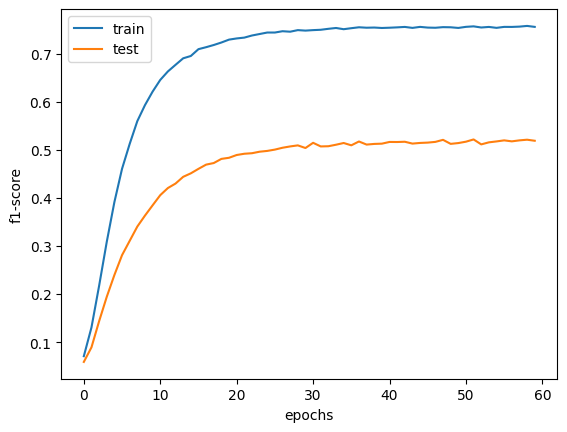

In [ ]:
plt.plot(train_score, label="train")
plt.plot(test_score, label="test")
plt.xlabel("epochs")
plt.ylabel("f1-score")
plt.legend()
plt.show()

Варианты как улучшить:
1. Изменить архитектуру(усложнить текущую, использовать, например, LSTM)
2. Поизменять параметры оптимизатора
3. Разбить на более мелкие батчи
4. Использовать лемматизацию вместо стемминга
5. Использовать другую векторизацию токенов
6. Аугментация